In [14]:
#predict the price of toyota corolla

import pandas as pd

df= pd.read_csv("C:\\data science class\\assignments\\MLR\\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [15]:
#specify features and target
X=df.drop(columns=['Price'])
Y=df['Price']

In [16]:
#data cleaning(missing)
df.isnull().sum()  #we get 0 null values from all columns
duplicates= df[df.duplicated()] # we got row 113 is duplicate
DF =df.drop_duplicates()
DF.shape

(1435, 11)

In [17]:
#specify features and target
X=DF.drop(columns=['Price'])
Y=DF['Price']
X.shape

(1435, 10)

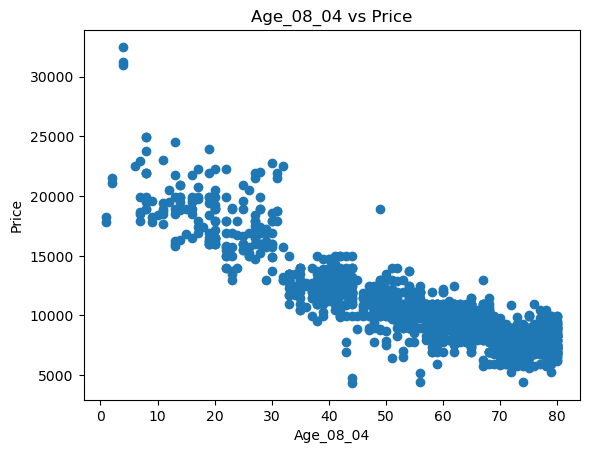

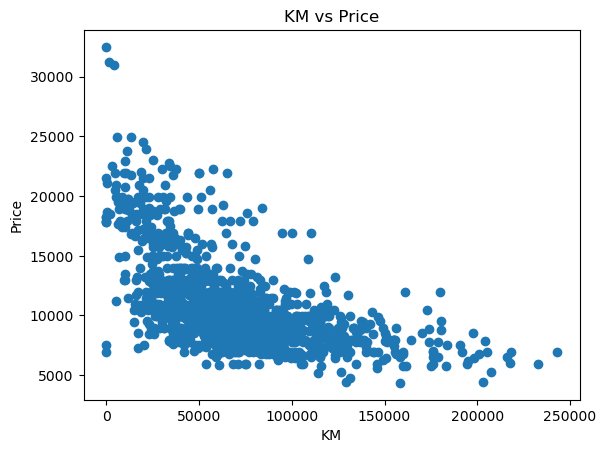

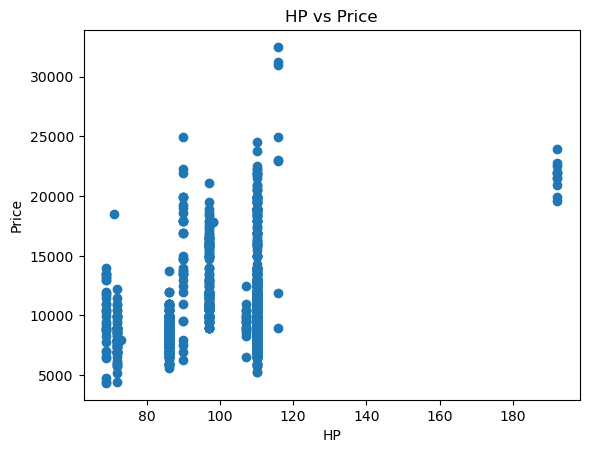

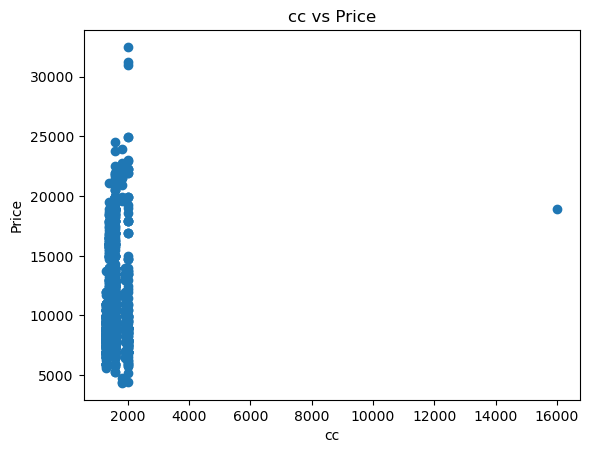

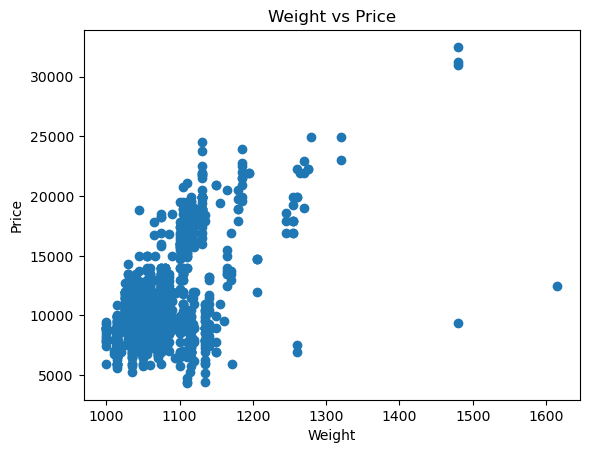

In [18]:
#histogram, scatter plot, box plot
import matplotlib.pyplot as plt
plt.scatter(DF[["Age_08_04"]],DF[["Price"]])
plt.title("Age_08_04 vs Price")
plt.xlabel("Age_08_04")
plt.ylabel("Price")
plt.show()

plt.scatter(DF[["KM"]],DF[["Price"]])
plt.title("KM vs Price")
plt.xlabel("KM")
plt.ylabel("Price")
plt.show()

plt.scatter(DF[["HP"]],DF[["Price"]])
plt.title("HP vs Price")
plt.xlabel("HP")
plt.ylabel("Price")
plt.show()

plt.scatter(DF[["cc"]],DF[["Price"]])
plt.title("cc vs Price")
plt.xlabel("cc")
plt.ylabel("Price")
plt.show()

plt.scatter(DF[["Weight"]],DF[["Price"]])
plt.title("Weight vs Price")
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

In [19]:
#Data Transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS= StandardScaler()
SS_X= SS.fit_transform(X.drop(columns=['Fuel_Type']))
SS_X= pd.DataFrame(SS_X)
X_columns = X.drop(columns=['Fuel_Type']).columns.tolist()
SS_X.columns=X_columns
SS_X

LE= LabelEncoder()
LE_X=LE.fit_transform(X['Fuel_Type'])
LE_X = pd.DataFrame(LE_X)
LE_X.columns= ['Fuel_Type']
LE_X

SS_X = pd.concat([SS_X, LE_X], axis=1)
SS_X

SS_Y= SS.fit_transform(DF[['Price']])
SS_Y= pd.DataFrame(SS_Y)
SS_Y.columns=['Price']

df = pd.concat([SS_X,SS_Y],axis=1)
df

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type,Price
0,-1.777268,-0.575958,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,1,0.770368
1,-1.777268,0.116474,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,1,0.839669
2,-1.723380,-0.716707,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,1,0.895109
3,-1.615603,-0.548902,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,1,1.172311
4,-1.400049,-0.802384,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.870688,1,0.839669
...,...,...,...,...,...,...,...,...,...,...,...
1430,0.701602,-1.281492,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-0.905299,2,-0.892845
1431,0.863267,-1.322689,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,2,0.034396
1432,0.809379,-1.375627,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,2,-0.615643
1433,0.755490,-1.378295,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,2,-0.962145


In [20]:
df.corr()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type,Price
Age_08_04,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484,0.076382,-0.876273
KM,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969,-0.424118,-0.569420
HP,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143,0.411973,0.314134
Automatic,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499,0.069456,0.033928
cc,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077,-0.276236,0.124375
Doors,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734,-0.025339,0.183604
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238,0.069560,0.063831
Weight,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000,-0.502479,0.575869
Fuel_Type,0.076382,-0.424118,0.411973,0.069456,-0.276236,-0.025339,NaN,0.069560,-0.502479,1.000000,-0.015883


In [21]:
#Data Partition + shuffle split cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SS_X, SS_Y, test_size=0.2, random_state=50)

X_train
y_train

,Price
897,-0.490902
772,0.063503
262,0.562467
1305,-0.892845
1061,-1.100746
...,...
229,0.333775
70,1.449514
132,1.449514
1313,-0.755630


In [22]:
X_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type
897,0.486048,-0.228715,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,2
772,0.593825,0.246790,0.568103,-0.242983,0.055249,1.015659,0.0,-0.140475,0.051938,2
262,-0.861164,-0.478461,0.568103,-0.242983,0.055249,1.015659,0.0,-0.140475,0.051938,2
1305,1.078821,0.039149,0.568103,-0.242983,0.055249,-1.084443,0.0,-0.140475,-0.426681,2
1061,1.294375,2.439515,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,2
...,...,...,...,...,...,...,...,...,...,...
229,-0.645610,-0.136634,-0.299942,-0.242983,-0.416182,-1.084443,0.0,-0.140475,-0.905299,2
70,-1.507826,-1.050370,-0.299942,-0.242983,-0.416182,1.015659,0.0,-0.140475,0.722003,2
132,-2.316153,-1.045967,0.568103,-0.242983,0.055249,-0.034392,0.0,-0.140475,0.626280,2
1313,1.078821,-0.015256,0.568103,-0.242983,0.055249,1.015659,0.0,-0.140475,0.051938,2


In [123]:
#models
'''
X_train= X_train[['Age_08_04']]
X_train= X_train[['Age_08_04','KM']]
X_train= X_train[['Age_08_04','KM','HP']]
X_train= X_train[['Age_08_04','KM','HP','Weight']]

'''

y_train
X_train= X_train[['Age_08_04']]
X_test =  X_test[['Age_08_04']]

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [125]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Training Root mean squared error:", np.round(rmse_train,2))

rsquare_train = r2_score(y_train,y_pred_train)
print("Training R2 score is:", np.round(rsquare_train,2)*100)

#================================================================================
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
print("test Root mean squared error:", np.round(rmse_test,2))

rsquare_test = r2_score(y_test,y_pred_test)
print("test R2 score is:", np.round(rsquare_test,2)*100)

Training Root mean squared error: 0.48
Training R2 score is: 77.0
test Root mean squared error: 0.49
test R2 score is: 76.0


In [128]:
y_train
y_test
X_train= X_train[['Age_08_04',"KM"]]
X_test =  X_test[['Age_08_04',"KM"]]

model=LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Training Root mean squared error:", np.round(rmse_train,2))

rsquare_train = r2_score(y_train,y_pred_train)
print("Training R2 score is:", np.round(rsquare_train,2)*100)

#================================================================================
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
print("test Root mean squared error:", np.round(rmse_test,2))

rsquare_test = r2_score(y_test,y_pred_test)
print("test R2 score is:", np.round(rsquare_test,2)*100)

Training Root mean squared error: 0.46
Training R2 score is: 79.0
test Root mean squared error: 0.46
test R2 score is: 79.0


In [130]:
y_train
y_test
X_train= X_train[["Age_08_04","KM","HP"]]
X_test =  X_test[["Age_08_04","KM","HP"]]

model=LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Training Root mean squared error:", np.round(rmse_train,2))

rsquare_train = r2_score(y_train,y_pred_train)
print("Training R2 score is:", np.round(rsquare_train,2)*100)

#================================================================================
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
print("test Root mean squared error:", np.round(rmse_test,2))

rsquare_test = r2_score(y_test,y_pred_test)
print("test R2 score is:", np.round(rsquare_test,2)*100)

Training Root mean squared error: 0.44
Training R2 score is: 80.0
test Root mean squared error: 0.41
test R2 score is: 83.0


In [132]:
y_train
y_test
X_train= X_train[["Age_08_04","KM","HP","Weight"]]
X_test =  X_test[["Age_08_04","KM","HP","Weight"]]

model=LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Training Root mean squared error:", np.round(rmse_train,2))

rsquare_train = r2_score(y_train,y_pred_train)
print("Training R2 score is:", np.round(rsquare_train,2)*100)

#================================================================================
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
print("test Root mean squared error:", np.round(rmse_test,2))

rsquare_test = r2_score(y_test,y_pred_test)
print("test R2 score is:", np.round(rsquare_test,2)*100)

Training Root mean squared error: 0.38
Training R2 score is: 86.0
test Root mean squared error: 0.37
test R2 score is: 86.0


In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# Apply Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
alpha_ridge = ridge.alpha
nonzero_ridge = (ridge.coef_ != 0).sum()

print(f"Ridge Regression R-squared: {r2_ridge}")
print(f"Ridge Regression Alpha: {alpha_ridge}")
print(f"Ridge Regression Non-zero coefficients: {nonzero_ridge}")

# Find non-zero variables for Ridge
nonzero_vars = X_train.columns[ridge.coef_ != 0]
print("\nNon-zero variables (Lasso):")
print(list(nonzero_vars))

Ridge Regression R-squared: 0.6833634877957073
Ridge Regression Alpha: 1.0
Ridge Regression Non-zero coefficients: 9

Non-zero variables (Lasso):
['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type']


In [25]:
#Ridge and Lasso Regularization
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.pipeline import make_pipeline
for alpha_val in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    lasso_custom = make_pipeline(StandardScaler(), Lasso(alpha=alpha_val, max_iter=10000))
    lasso_custom.fit(X_train, y_train)

    y_test_pred = lasso_custom.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    non_zero_count = sum(lasso_custom.named_steps['lasso'].coef_ != 0)

    print(f"\nAlpha: {alpha_val}")
    print("Test R²:", np.round(r2_test,4))
    print(f"Retained Features: {non_zero_count}")


Alpha: 0.1
Test R²: 0.8301
Retained Features: 4

Alpha: 0.2
Test R²: 0.7613
Retained Features: 3

Alpha: 0.3
Test R²: 0.6854
Retained Features: 2

Alpha: 0.4
Test R²: 0.613
Retained Features: 1

Alpha: 0.5
Test R²: 0.5252
Retained Features: 1

Alpha: 0.6
Test R²: 0.4166
Retained Features: 1

Alpha: 0.7
Test R²: 0.2871
Retained Features: 1

Alpha: 0.8
Test R²: 0.1367
Retained Features: 1

Alpha: 0.9
Test R²: -0.0001
Retained Features: 0

Alpha: 1
Test R²: -0.0001
Retained Features: 0


In [26]:
''' when alpha is 0.1 accuracye is 0.83 and feature is 4 but when we change Alpha 0.2 accuracy decrease and feature also decrease
so we can't comprmise the accuracye for less feature so i go with the alpha is 0.1 and 4 features 

so my model selection is also verified with 4 features has accuracy is 86%
'''

" when alpha is 0.1 accuracye is 0.83 and feature is 4 but when we change Alpha 0.2 accuracy decrease and feature also decrease\nso we can't comprmise the accuracye for less feature so i go with the alpha is 0.1 and 4 features \n\nso my model selection is also verified with 4 features has accuracy is 86%\n"

In [27]:
#Interview question
'''1)Normalization and Standardization
Normalization:
Rescales the data into a fixed range [0, 1].
Best when features have different scales and no outliers.
Formula:  𝑋_norm=(𝑋i−𝑋min)/(𝑋max−𝑋min)
it help us to put data into fixed range

Standardization:
Rescales data to have mean = 0 and standard deviation = 1.
Preferred when data has outliers
Formula: 𝑋std=(𝑋−𝜇)/𝜎
it helps us to center the data around the 0 based on standard deviation
'''
'''2) techniques to address multicolinearity issue
- remove the independent variables which has high correlation with another x variables rather than y(target) variable
- use Principle component analysis to convert correlated variables in non-correlated variables(PC's)
- use shrinkage methods like Ridge and lasso regularization to remove the variable which has zero coefficient after applying method
- extract more data 
'''

"2) techniques to address multicolinearity issue\n- remove the independent variables which has high correlation with another x variables rather than y(target) variable\n- use Principle component analysis to convert correlated variables in non-correlated variables(PC's)\n- use shrinkage methods like Ridge and lasso regularization to remove the variable which has zero coefficient after applying method\n- extract more data \n"